In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
heart_data = pd.read_csv('heart.csv')

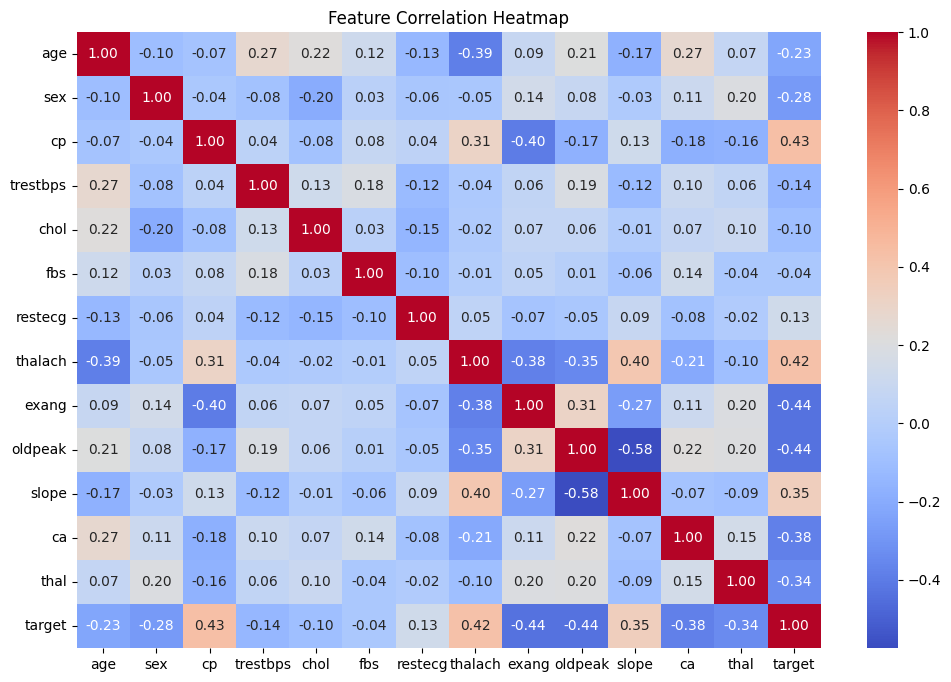

In [3]:
plt.figure(figsize=(12, 8))
sns.heatmap(heart_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

In [4]:
correlation_with_target = heart_data.corr()['target'].sort_values(ascending=False)
print("Correlation with Target Variable:\n", correlation_with_target)

Correlation with Target Variable:
 target      1.000000
cp          0.434854
thalach     0.422895
slope       0.345512
restecg     0.134468
fbs        -0.041164
chol       -0.099966
trestbps   -0.138772
age        -0.229324
sex        -0.279501
thal       -0.337838
ca         -0.382085
exang      -0.438029
oldpeak    -0.438441
Name: target, dtype: float64


In [15]:
selected_features = ['cp', 'thalach', 'slope', 'restecg', 'sex', 'thal', 'ca', 'exang', 'oldpeak']
X_selected = heart_data[selected_features]
y = heart_data['target']

In [16]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)



In [18]:
from sklearn.model_selection import train_test_split, GridSearchCV
# Model Building with Hyperparameter Tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}
rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [19]:
best_model = grid_search.best_estimator_

In [20]:
# Predictions
y_pred = best_model.predict(X_test)


In [22]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Improved Model Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Improved Model Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       102
           1       1.00      1.00      1.00       103

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205

Confusion Matrix:
 [[102   0]
 [  0 103]]


Feature Importance:
 thalach    0.204802
cp         0.179018
oldpeak    0.157145
ca         0.150076
thal       0.138772
slope      0.056527
exang      0.049549
sex        0.032415
restecg    0.031696
dtype: float64


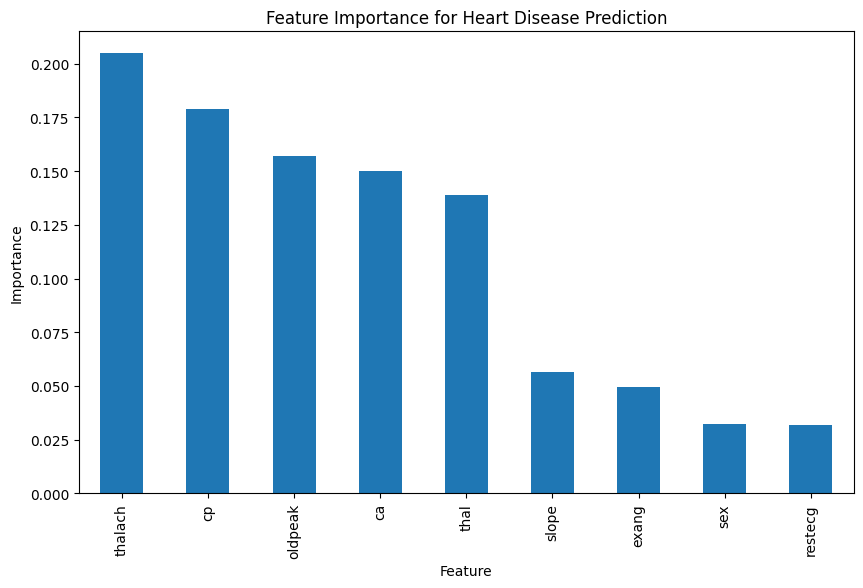

In [23]:
# Feature Importance
import matplotlib.pyplot as plt

feature_importance = pd.Series(best_model.feature_importances_, index=selected_features).sort_values(ascending=False)
print("Feature Importance:\n", feature_importance)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
feature_importance.plot(kind='bar')
plt.title('Feature Importance for Heart Disease Prediction')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

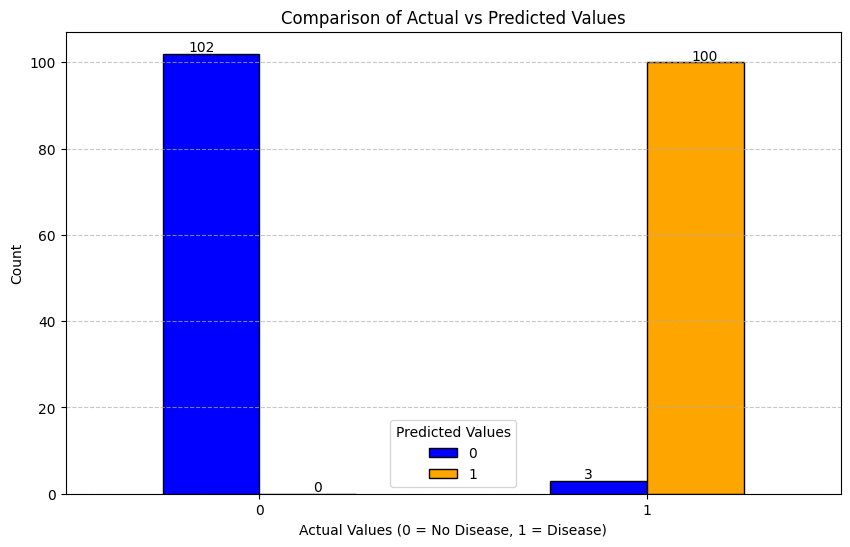

In [13]:
# Convert actual and predicted values into DataFrame for comparison
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison['Correct'] = np.where(comparison['Actual'] == comparison['Predicted'], 'Correct', 'Incorrect')

# Count values by category
grouped = comparison.groupby(['Actual', 'Predicted']).size().unstack(fill_value=0)

# Bar Plot
grouped.plot(kind='bar', figsize=(10, 6), color=['blue', 'orange'], edgecolor='black')

# Add details
plt.title('Comparison of Actual vs Predicted Values')
plt.xlabel('Actual Values (0 = No Disease, 1 = Disease)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Predicted Values')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bar counts
for i in grouped.index:
    for j in grouped.columns:
        count = grouped.loc[i, j]
        plt.text(i - 0.15 + j * 0.3, count + 0.5, str(count), ha='center', fontsize=10)

plt.show()

In [14]:
comparison_data = pd.DataFrame({
    'Actual': y_test.values[:5],
    'Predicted': y_pred[:5]
})

print(comparison_data)

   Actual  Predicted
0       1          1
1       1          1
2       0          0
3       1          1
4       0          0
